Phase folding -> Taking multiple periods (1 transit per period) and overlay them on each other

In [1]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import lightkurve as lk

/opt/homebrew/lib/python3.10/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/buyer/.lightkurve/cache. Please move all the files in the legacy directory /Users/buyer/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


## Setting initial planet & pulling in sector data

In [2]:
TIC = 'TIC 424865156.01'
available_data_select = lk.search_lightcurve(TIC)#, author = 'SPOC')[0:9]
lc_collection = available_data_select.download_all()#.stitch() # Stitch the data from each sector onto one graph

Could not resolve TIC 424865156.01 to a sky position.
/opt/homebrew/lib/python3.10/site-packages/lightkurve/search.py:485: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'plot'

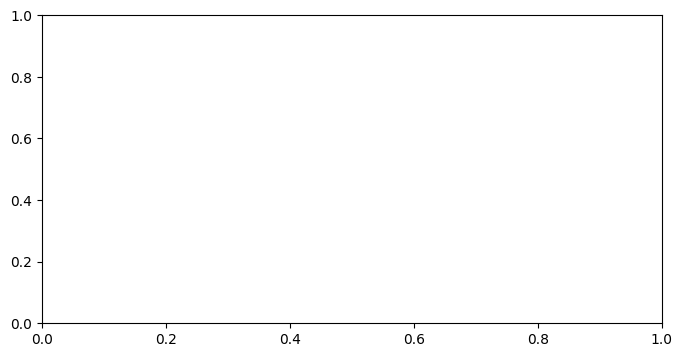

In [3]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (8, 4))
lc_collection.plot(ax = ax, linewidth = 0, marker = 0, color = 'pink', markersize = 1, alpha = 0.8)

## Phase folding the object

In [ ]:
period = 83.8979 # Get this from ExoFop -> are there IDs that aren't known?
t0 = 2125.847 # time of first transit

In [ ]:
lc_phased = lc_collection.fold(period = period, epoch_time = t0)

In [ ]:
%matplotlib inline
fig, ax = plt.subplots()
lc_phased.plot(ax = ax, linewidth = 0, marker = 0, color = 'pink', markersize = 1, alpha = 0.8)

### Binning phased data

In [ ]:
bin_time = 15/24/60 # Set the bin time in units of days
lc_phased_binned = lc_phased.bin(bin_time)

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (8, 5)) # Determine impact on data shown by changing this field
lc_phased.plot(ax = ax, linewidth = 0, marker = '.', color = 'pink', markersize = 1, alpha = 0.25, label = 'Phased, Unbinned')
lc_phased_binned.plot(ax = ax, linewidth = 0, marker = 'o', color = 'gold', markersize = 1.3, alpha = 0.999, label = 'Phased, Binned')

### Remove scatter
Since the curve has been phase folded, only the data from around t0 (0 on x axis) is really required as that is where a transit event is happening.
Of course this needs to be tweaked in the case of multiple planetary systems...

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (8, 5)) # Determine impact on data shown by changing this field
lc_phased.plot(ax = ax, linewidth = 0, marker = '.', color = 'pink', markersize = 1, alpha = 0.8, label = 'Phased, Unbinned')
lc_phased_binned.plot(ax = ax, linewidth = 0, marker = 'o', color = 'gold', markersize = 1.3, alpha = 1, label = 'Phased, Binned')

plt.xlim(-2, 2)
plt.ylim(0.996, 1.004)

Use these graphs to determine the radius lol

/jk there's more data we can use